## Black Friday Sales Analysis- Project Overview

Goal: This project aims to examine Black Friday sales data to gain insights into customer purchasing behavior and market trends. By leveraging exploratory data analysis (EDA) and visualization techniques, we aim to understand spending patterns across various demographics and product categories.

Key Phases:

1. Data Acquisition & Understanding
2. Data Cleaning & Preprocessing
3. Exploratory Data Analysis (EDA)
4. Insights & Business Implications

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Acquisition (Load the dataset and examine its structure)

In [3]:
df = pd.read_csv("BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### 2. Data Exploration



In [4]:
print("Dataset Dimensions:", df.shape)
print("\nDataset Information:")
df.info()
print("\nSummary Statistics:")
df.describe()

Dataset Dimensions: (537577, 12)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), in

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


### 3. Data Cleaning

In [5]:
df.isnull().sum()  # Before handling missing values

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
#Impute Missing data using median of the column:
def impute_nan(df, variable, median):
    df[variable] = df[variable].fillna(median)
    
#Calculate median:
median = df.Product_Category_2.median()

#Call the function:
impute_nan(df, 'Product_Category_2', median)

In [7]:
#Same for the Product_Category_3 Column:
median = df.Product_Category_3.median()

#Call the function:
impute_nan(df, 'Product_Category_3', median)

#check for updation:
df.isnull().sum()  # After handling missing values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [8]:
print("Number of unique product IDs :", df['Product_ID'].nunique())
print("Number of unique genders :", df['Gender'].nunique())  # F and M
print("Number of unique age groups :", df['Age'].nunique()) # ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
print("Number of unique occupations :", df['Occupation'].nunique())# [10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,5, 14, 13,  6]
print("Number of unique city categories :", df['City_Category'].nunique()) #['A', 'C', 'B']
print("Number of unique values in Stay In Current City Years :", df['Stay_In_Current_City_Years'].nunique()) #['2', '4+', '3', '1', '0']
print("Number of unique marital statuses :", df['Marital_Status'].nunique()) #  [0, 1]  0 --> Unmarried and 1 --> Married
print("Number of unique values in Product Category 1 :", df['Product_Category_1'].nunique()) 
print("Number of unique values in Product Category 2 :", df['Product_Category_2'].nunique()) 
print("Number of unique values in Product Category 3 :", df['Product_Category_3'].nunique())

Number of unique product IDs : 3623
Number of unique genders : 2
Number of unique age groups : 7
Number of unique occupations : 21
Number of unique city categories : 3
Number of unique values in Stay In Current City Years : 5
Number of unique marital statuses : 2
Number of unique values in Product Category 1 : 18
Number of unique values in Product Category 2 : 17
Number of unique values in Product Category 3 : 15


In [9]:
df['Purchase'].sum()/len(df["Purchase"])   # calculates the average (mean) purchase amount.

9333.859852635065

### 4. Exploratory Data Analysis (EDA)



In [10]:
# This code creates a new DataFrame named data with a single column called "Ratio" that contains the count of records for each gender
data =  pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]}, index= ['Male', 'Female'])
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

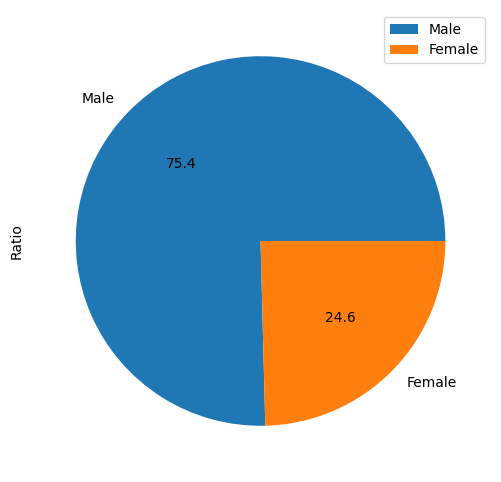

In [11]:
# The pie chart depicts the distribution of Male vs. Female in the dataset
data.plot.pie(y = 'Ratio', figsize=(6,6), autopct= "%.1f")

### -- AVERAGE PURCHASE BASED ON GENDER COLUMN

<Axes: title={'center': 'Gender Ratio'}>

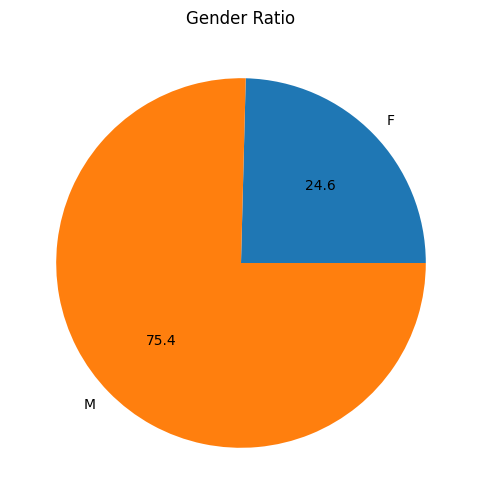

In [12]:
# This pie chart shows the distribution of Gender in the dataset (pie chart)
df.groupby('Gender').size().plot(kind= 'pie', autopct= "%.1f", title= 'Gender Ratio',figsize=(6,6))

<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

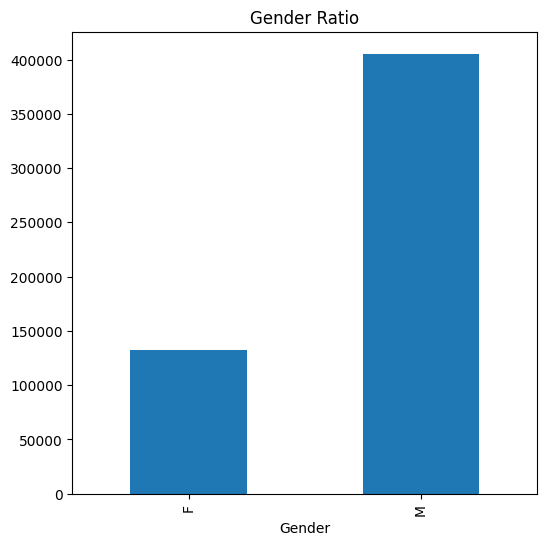

In [13]:
# This bar chart shows the distribution of Gender in the dataset (bar chart)
df.groupby('Gender').size().plot(kind= 'bar', title= 'Gender Ratio',figsize=(6,6))

### --AVERAGE PURCHASE BASED ON AGE COLUMN

In [14]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

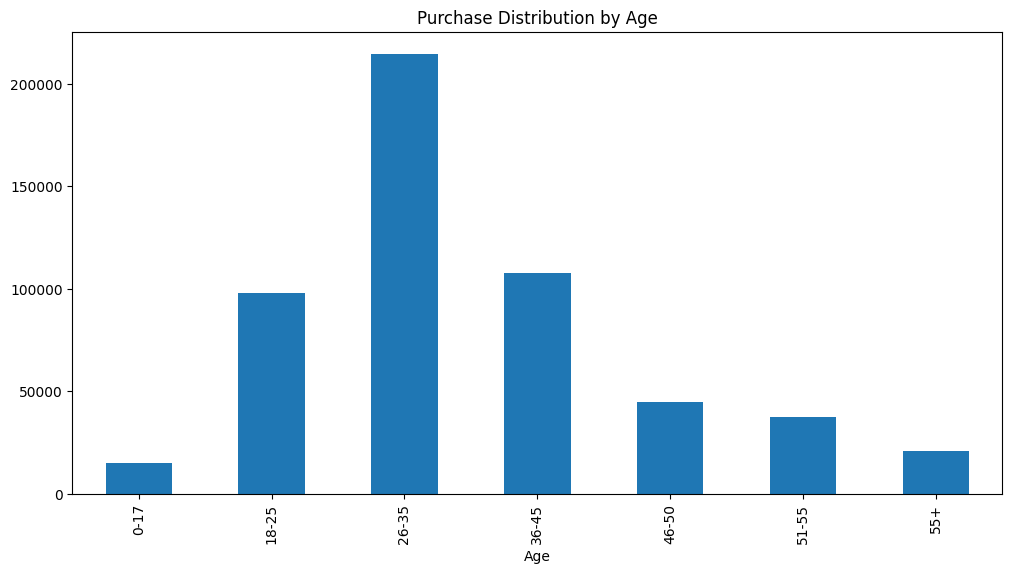

In [15]:
# This bar chart shows the distribution of age in the dataset (bar chart)
df.groupby('Age').size().plot(kind='bar', figsize=(12,6), title="Purchase Distribution by Age")

<Axes: title={'center': 'Purchase Distribution by Age'}>

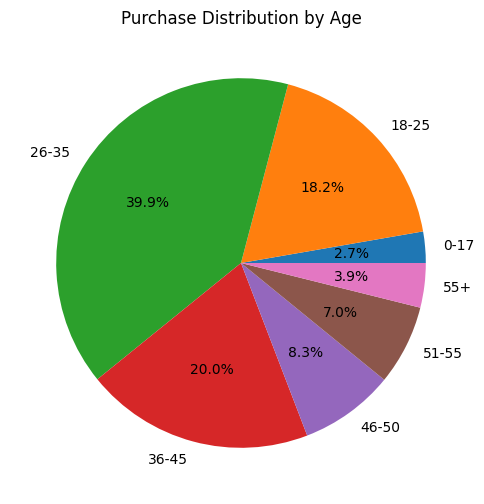

In [16]:
# This pie chart shows the distribution of age in the dataset (pie chart)
df.groupby('Age').size().plot(kind='pie', figsize=(12,6), title="Purchase Distribution by Age", autopct= '%.1f%%')

### Unique purchases on each Product

In [17]:
lst = []
for i in df['Age'].unique():
    lst.append([i, df[df['Age']== i]['Product_ID'].nunique()])

data = pd.DataFrame(lst, columns=['Age','Products'])
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

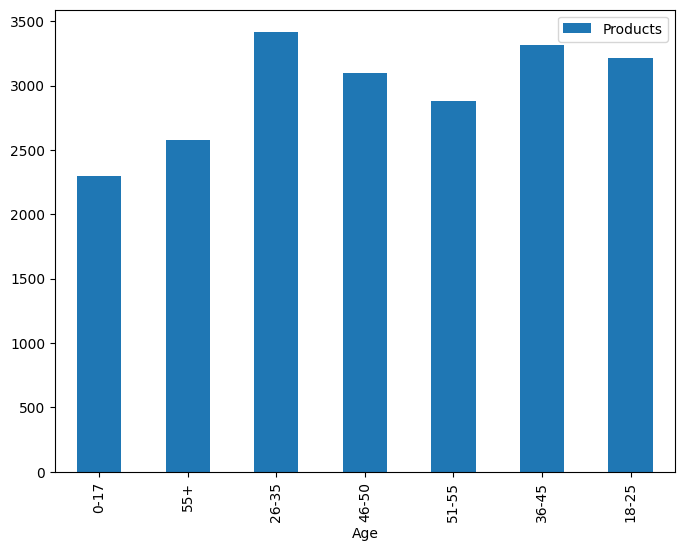

In [18]:
# This bar chart shows how many purchases were made by each age group (bar chart)
data.plot.bar(x = 'Age', figsize=(8,6))

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

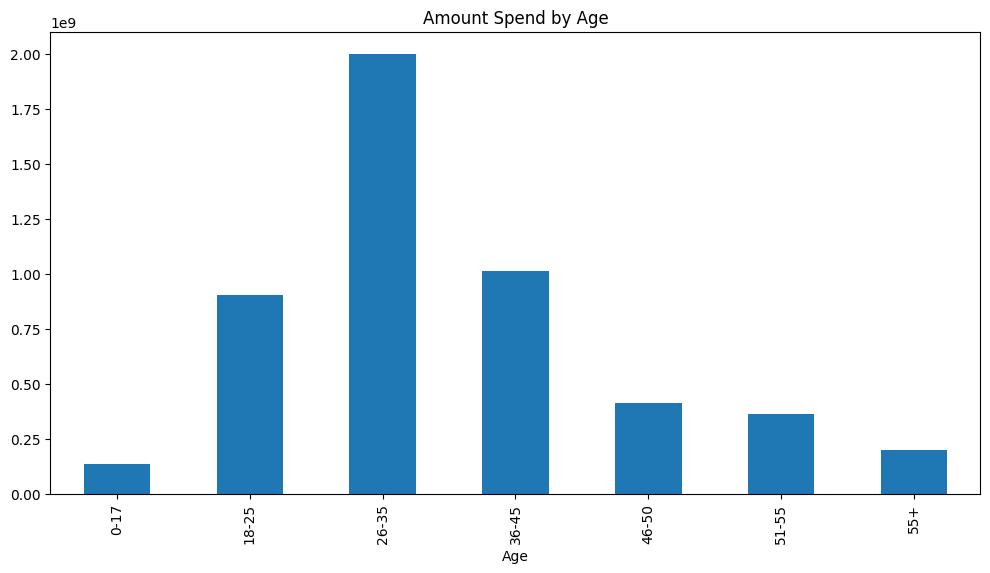

In [19]:
# This bar graph shows the Amount soend by different age groups 
df.groupby('Age').sum()['Purchase'].plot(kind='bar', figsize=(12,6), title="Amount Spend by Age")

## Average Purchase Based upon Marital Status

<Axes: title={'center': 'Average Purchase upon Marital Status'}>

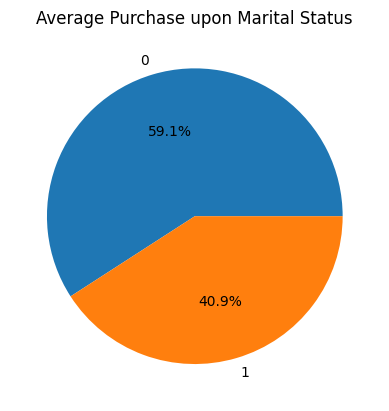

In [20]:
# This pie chart shows the Marital_status depending upon the gender 
df.groupby('Marital_Status').size().plot(kind='pie', autopct= '%0.1f%%', title= 'Average Purchase upon Marital Status')

### -- VISUALIZATION OF GENDER AND AGE COLUMN TOGETHER

<Axes: xlabel='Age', ylabel='count'>

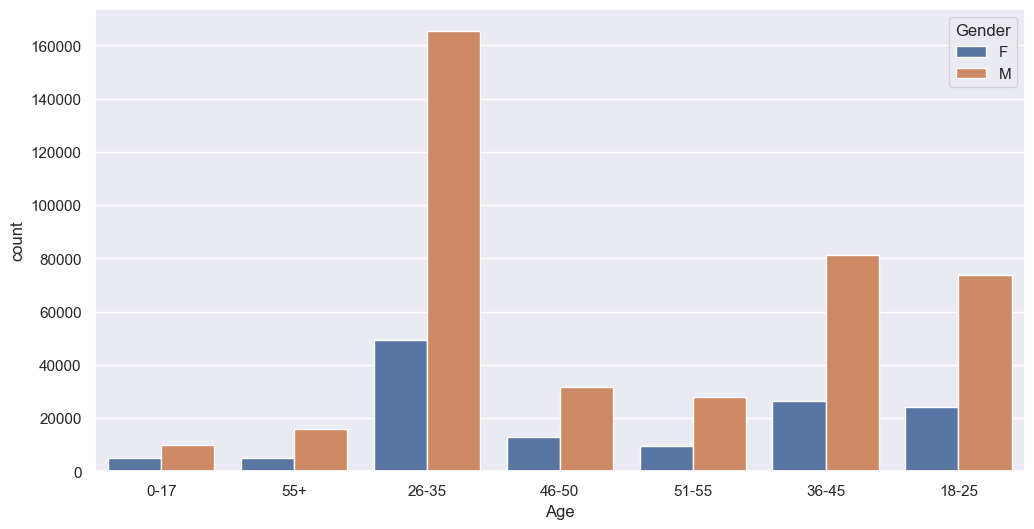

In [21]:
sns.set(rc = {'figure.figsize': (12,6)})
sns.countplot(x = 'Age', hue='Gender', data = df)

<Axes: xlabel='Gender', ylabel='count'>

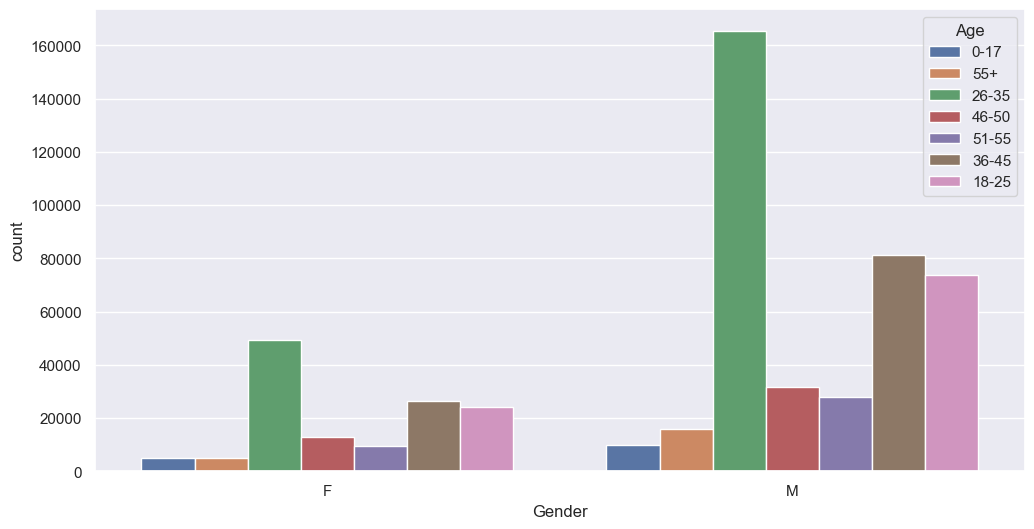

In [22]:
sns.set(rc = {'figure.figsize': (12,6)})
sns.countplot(x = 'Gender', hue='Age', data = df)

-- VISUALIZATION OF GENDER AND MARITAL STATUS COLUMN TOGETHER

<Axes: xlabel='Gender', ylabel='count'>

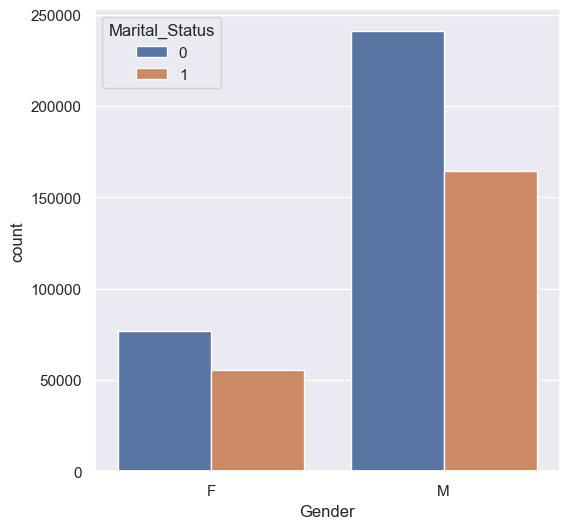

In [23]:
sns.set(rc = {'figure.figsize': (6,6)})
sns.countplot(x = 'Gender', hue='Marital_Status', data = df)

### -- WHICH CITY_CATEGORY IS THE LARGEST IN FREQUENCY ?

<Axes: xlabel='City_Category', ylabel='count'>

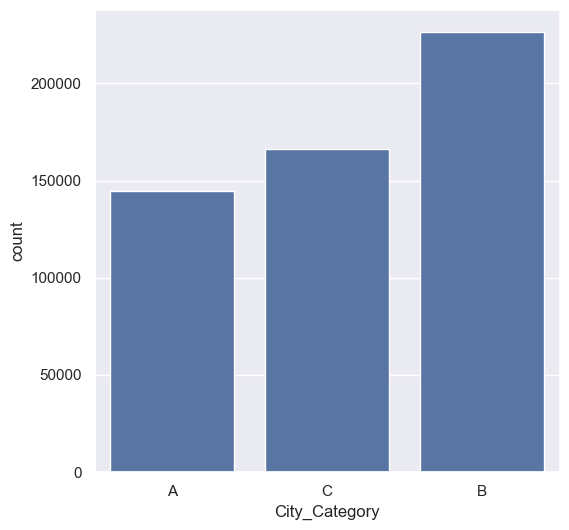

In [24]:
sns.countplot(x = df['City_Category'])

## Average Purchase Based on City Column

<Axes: title={'center': 'Average Purchase Based on City Column'}>

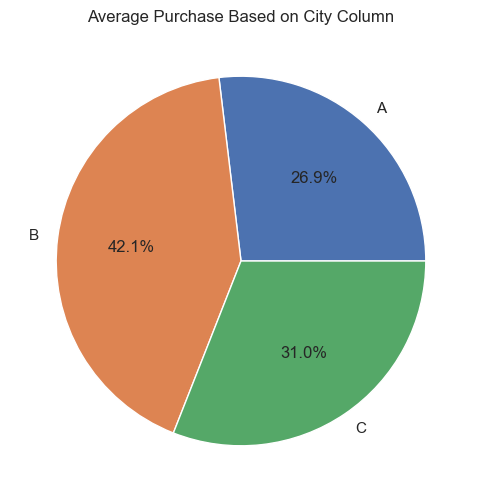

In [25]:
df.groupby('City_Category').size().plot(kind= 'pie', autopct= '%.1f%%',title='Average Purchase Based on City Column')

<Axes: >

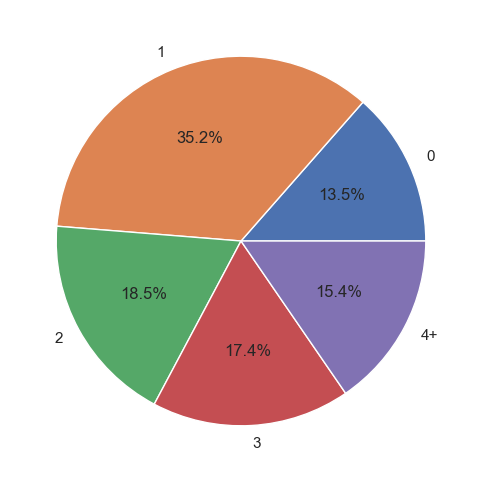

In [26]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind= 'pie', autopct= '%.1f%%')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

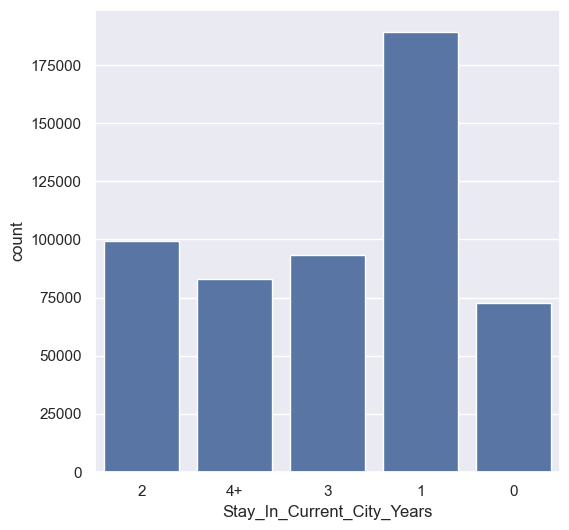

In [27]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

CUSTOMERS LIVING IN THEIR CURRENT CITY FOR A YEARS BASED ON GENDER

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

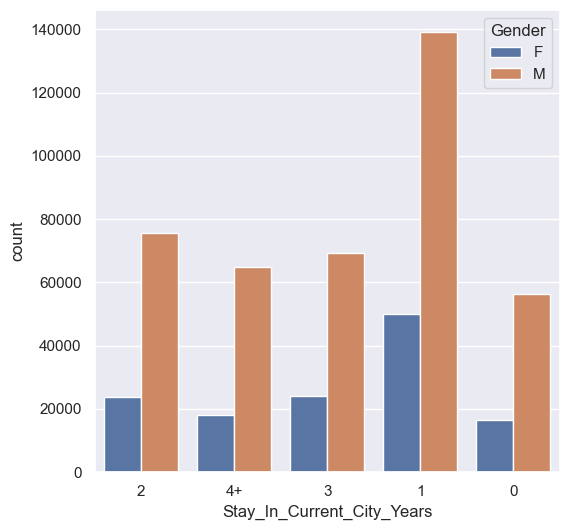

In [28]:
sns.countplot(x= 'Stay_In_Current_City_Years',hue= 'Gender',data=df)

CUSTOMERS LIVING IN THEIR CURRENT CITY FOR A YEARS BASED ON GENDER

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

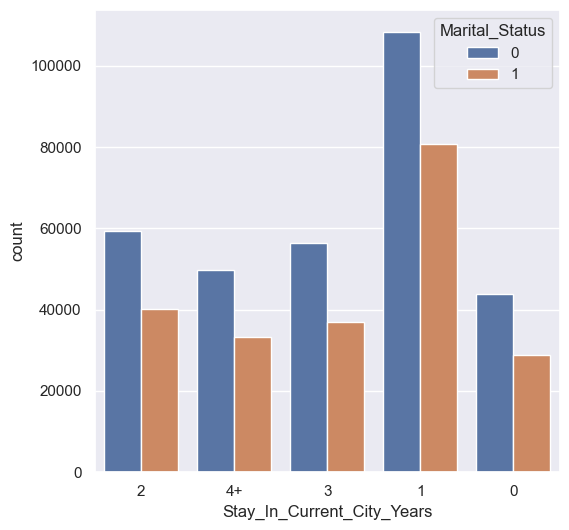

In [29]:
sns.countplot(x= 'Stay_In_Current_City_Years',hue= 'Marital_Status',data=df)

<Axes: xlabel='Stay_In_Current_City_Years'>

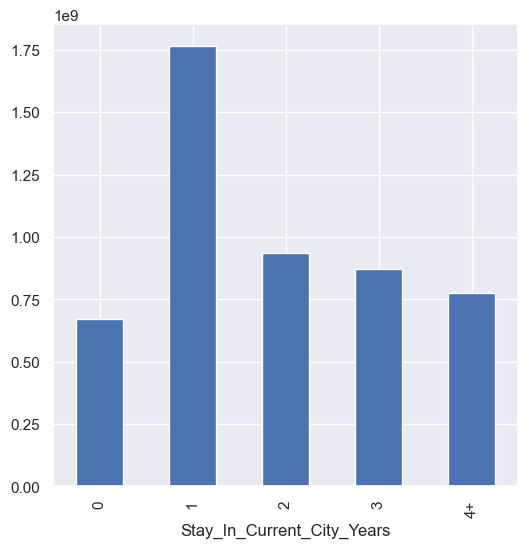

In [30]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind= 'bar')

### -- AVERAGE PURCHASE BASED ON OCCUPATION COLUMN

Text(0.5, 1.0, 'Average Purchase Based on Occupation')

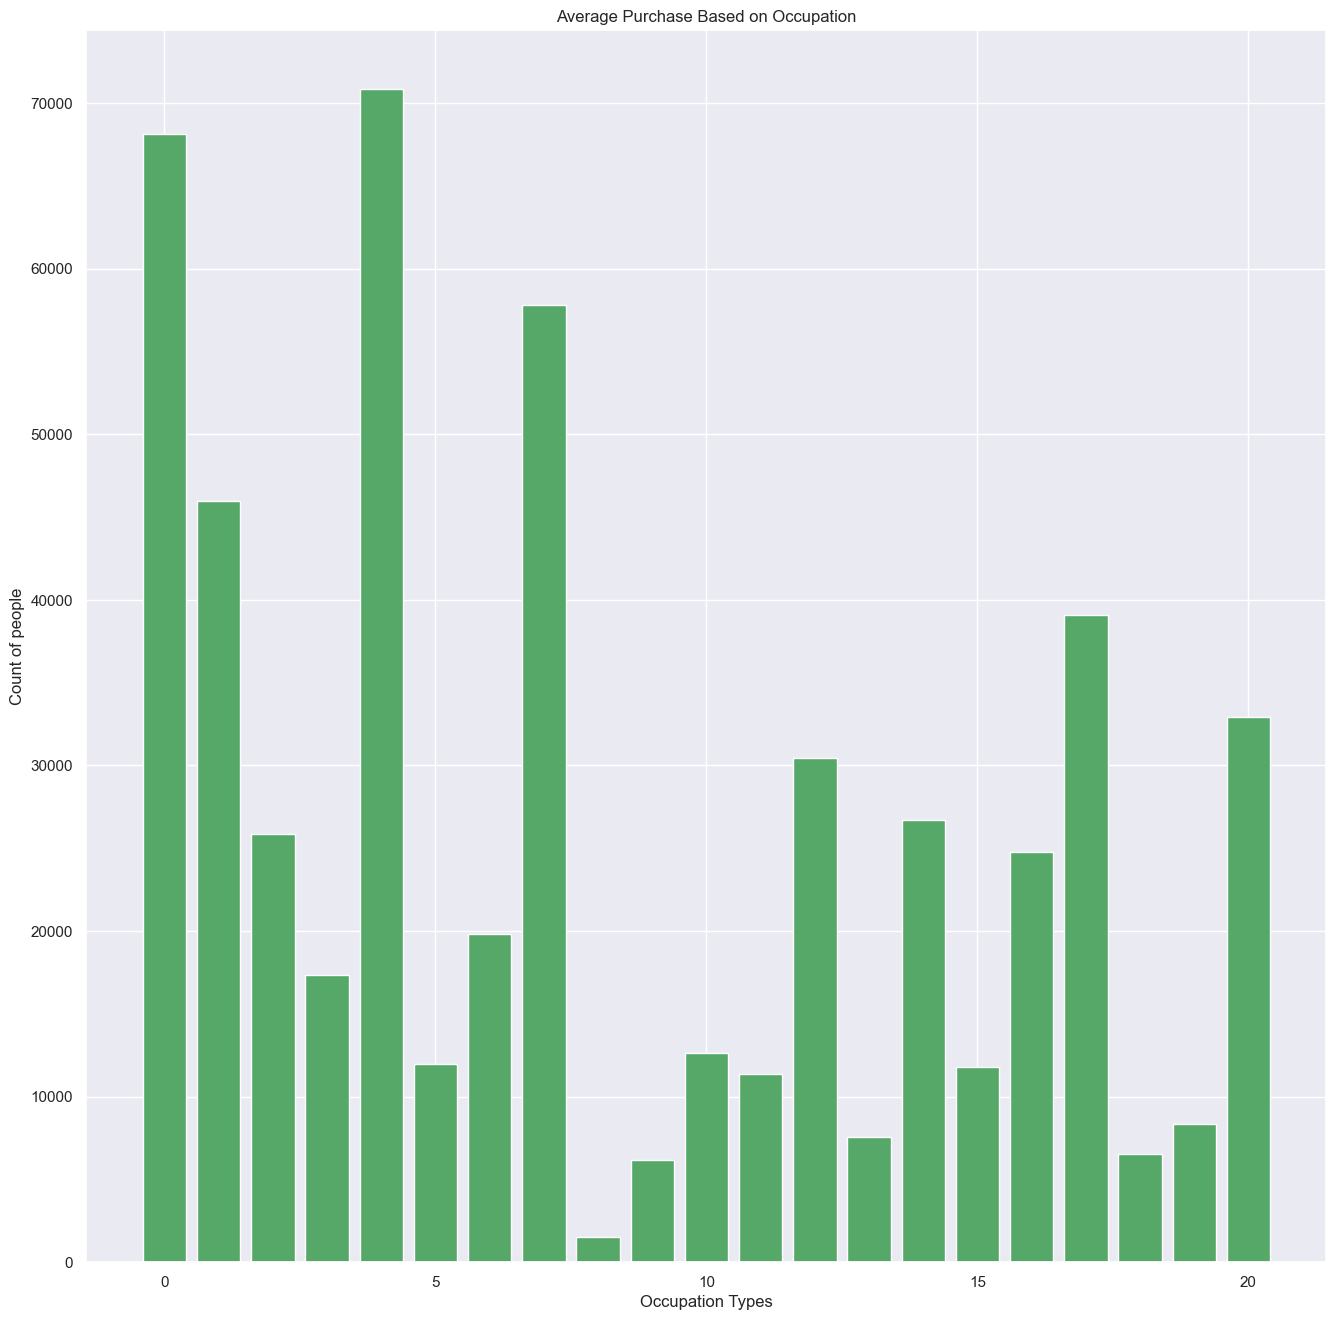

In [31]:
purchase_occupation = df['Occupation'].value_counts()
plt.figure(figsize = (16,16))
plt.bar(purchase_occupation.index, purchase_occupation.values, color ='g')
plt.xlabel('Occupation Types')
plt.ylabel('Count of people')
plt.title('Average Purchase Based on Occupation')

FREQUENCY OF OCCUPATION (WHICH HAS HIGHEST FREQUNECY OCCUPATION)

<Axes: xlabel='Occupation'>

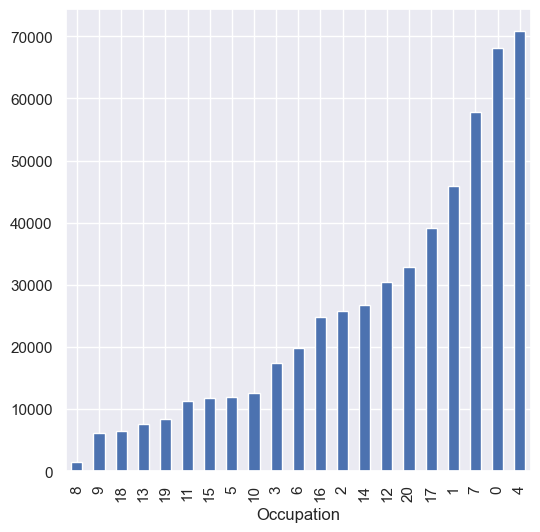

In [32]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

BASED UPON PURCHASE, WHICH OCCUPATION HAS HIGHEST PURCHASES

<Axes: xlabel='Occupation'>

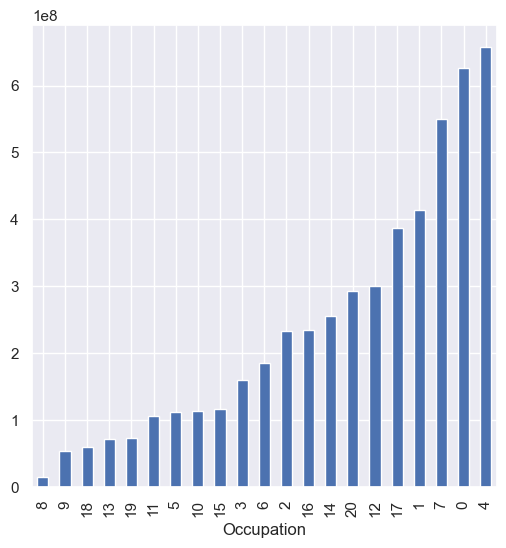

In [33]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

### -- AVERAGE PURCHASE BASED ON MARITAL_STATUS COLUMN

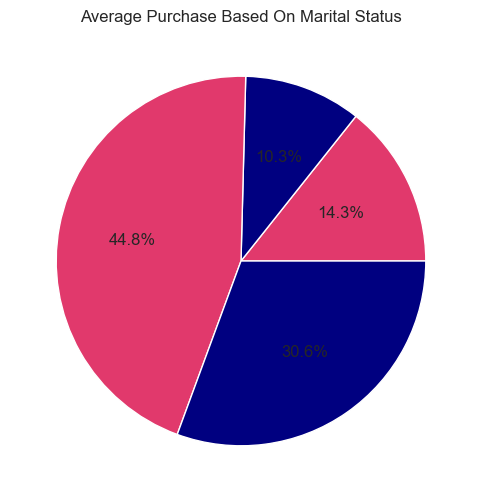

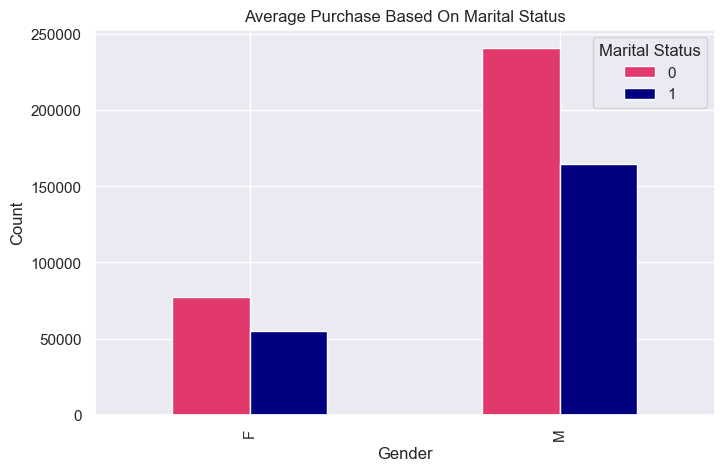

In [34]:

# Group by Gender and Marital_Status, then count occurrences
purchase_marital_status = df.groupby(['Gender', 'Marital_Status']).size()

# PIE CHART
plt.figure(figsize=(6,6))
colors = ['#E1396C', '#000080']
plt.pie(purchase_marital_status,autopct='%.1f%%', colors=colors)
plt.title("Average Purchase Based On Marital Status")
plt.show()

# BAR CHART
purchase_marital_status.unstack(level=1).plot(kind='bar', figsize=(8,5), color=['#E1396C', '#000080'])
plt.title("Average Purchase Based On Marital Status")
plt.ylabel("Count")
plt.legend(title="Marital Status")
plt.show()

BASED UPON MARITAL STATUS, WHICH OCCUPATION HAS HIGHEST PURCHASES

<Axes: xlabel='Occupation', ylabel='count'>

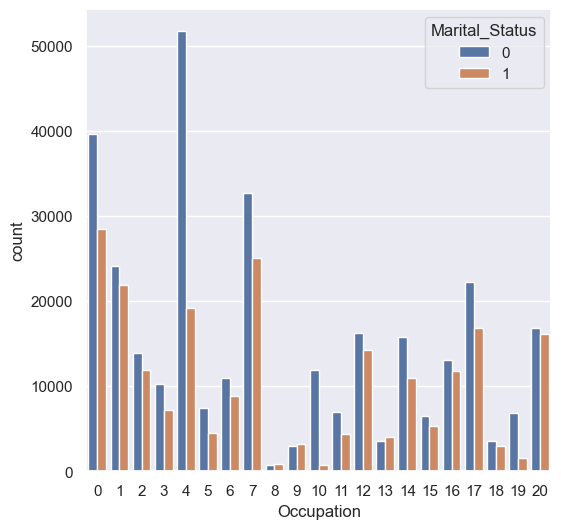

In [35]:
sns.countplot(x = 'Occupation', hue='Marital_Status', data =df)

BASED UPON GENDER, WHICH OCCUPATION HAS HIGHEST PURCHASES

<Axes: xlabel='Occupation', ylabel='count'>

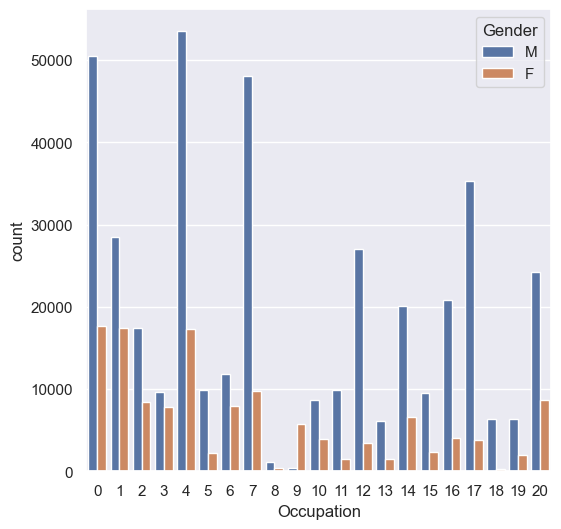

In [36]:
sns.countplot(x = 'Occupation', hue='Gender', data =df)

Product ID Analysis

<Axes: xlabel='Occupation'>

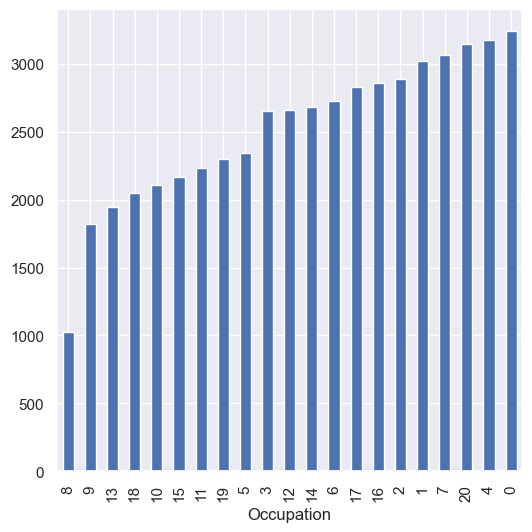

In [37]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind= 'bar')

Product Category Analysis Individually

<Axes: xlabel='Product_Category_1'>

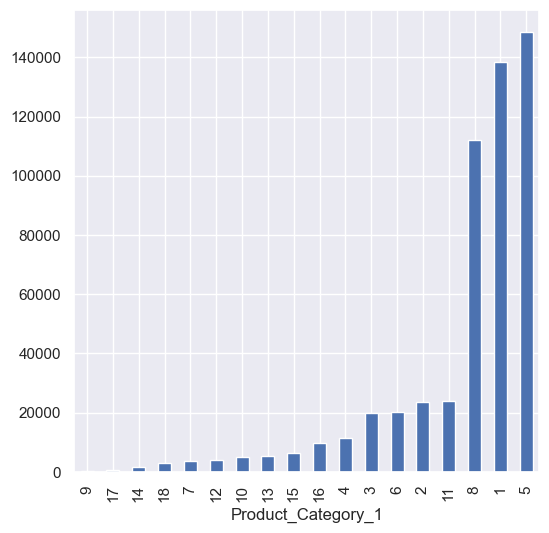

In [38]:
df.groupby('Product_Category_1').size().sort_values().plot(kind= 'bar')

<Axes: xlabel='Product_Category_2'>

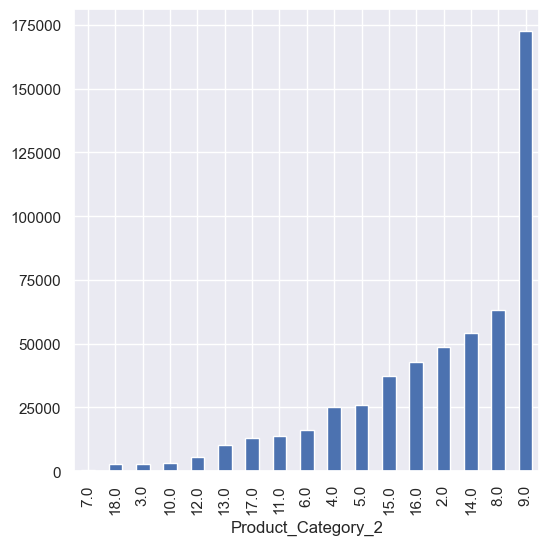

In [39]:
df.groupby('Product_Category_2').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_3'>

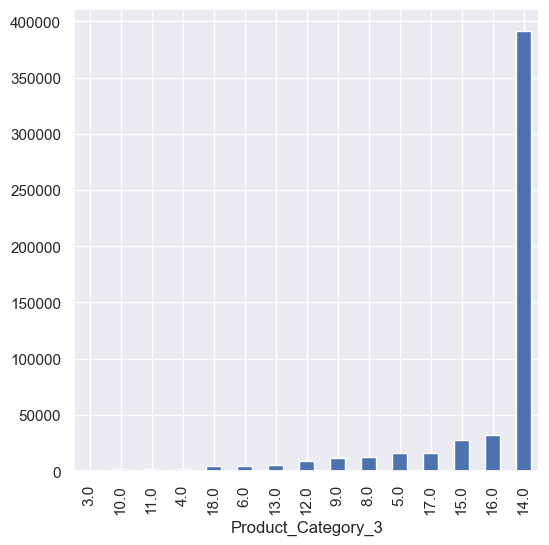

In [40]:
df.groupby('Product_Category_3').size().sort_values().plot(kind='bar')

-- PURCHASES DONE BY PRODUCT CATEGORY 1 (WHICH HAS HIGHEST ?)

<Axes: xlabel='Product_Category_1'>

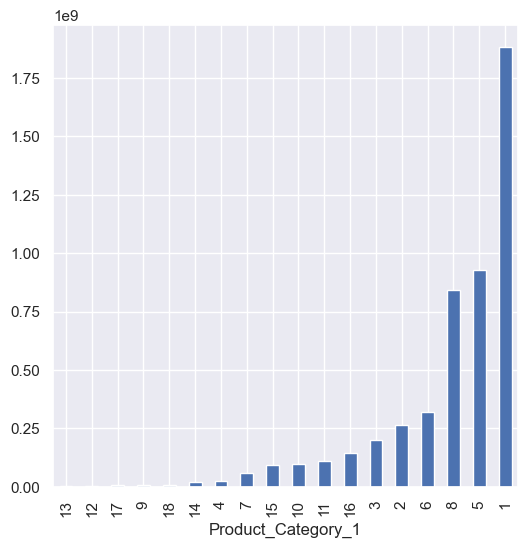

In [41]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

-- PURCHASES DONE BY PRODUCT CATEGORY 2 (WHICH HAS HIGHEST ?)

<Axes: xlabel='Product_Category_2'>

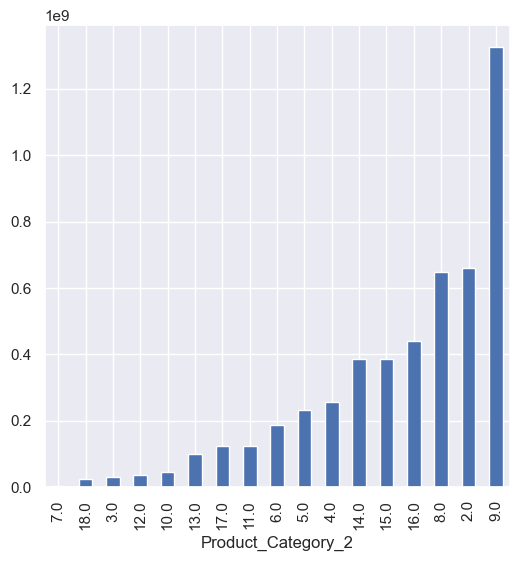

In [42]:
df.groupby('Product_Category_2').sum()['Purchase'].sort_values().plot(kind='bar')

-- PURCHASES DONE BY PRODUCT CATEGORY 3 (WHICH HAS HIGHEST ?)

<Axes: xlabel='Product_Category_3'>

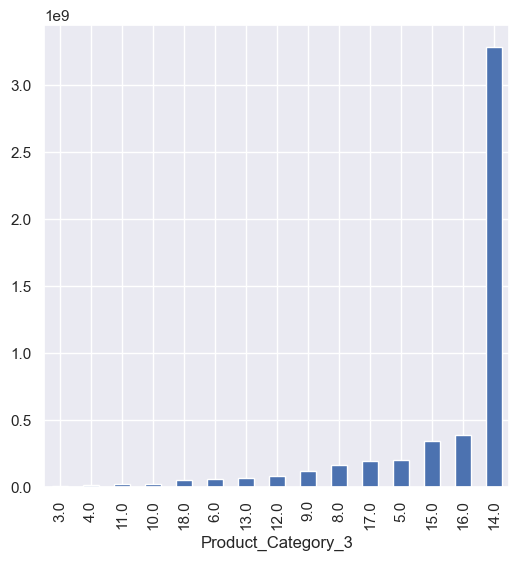

In [43]:
df.groupby('Product_Category_3').sum()['Purchase'].sort_values().plot(kind='bar')

--VISUALIZATION OF GENDER AND AGE COLUMN TOGETHER

In [44]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] + "_" + str(df['Marital_Status'][i]))

df['MaritalGender'] = l

In [45]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,14.0,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,14.0,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,14.0,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

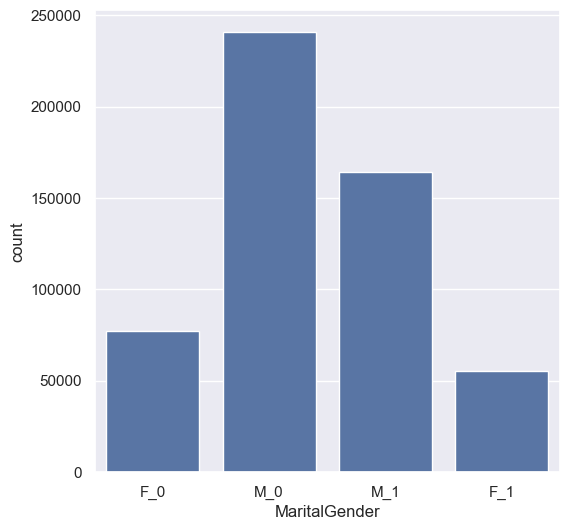

In [46]:
sns.countplot(x = df['MaritalGender'])

-- AGE BASED UPON MARITAL GENDER

<Axes: xlabel='Age', ylabel='count'>

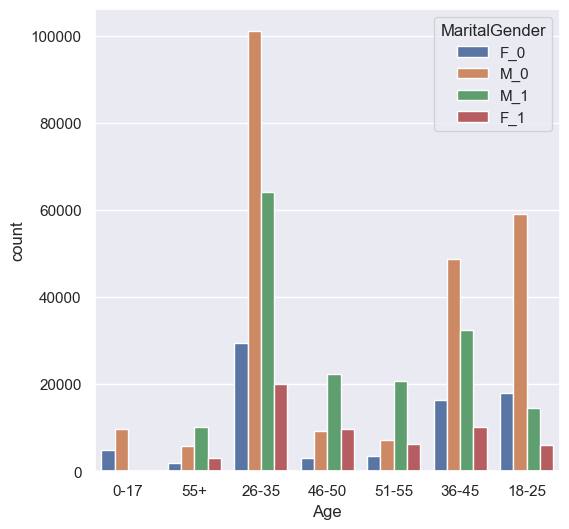

In [47]:
sns.countplot(x = df['Age'], hue= df['MaritalGender'])

MARITAL GENDER BASED UPON PRODUCT CATEGORY COLUMN

<Axes: xlabel='Product_Category_1', ylabel='count'>

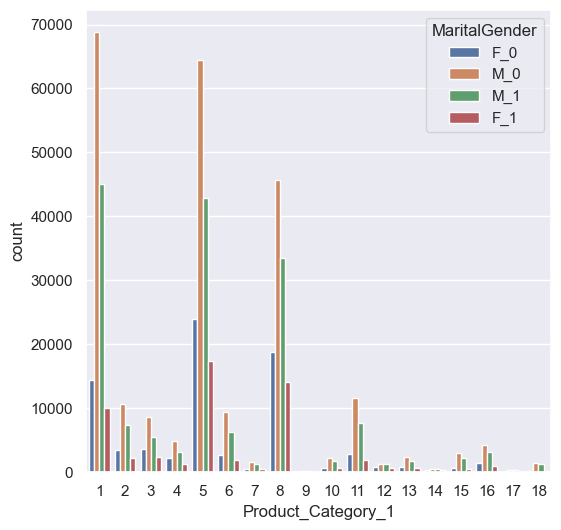

In [48]:
sns.countplot(x = df['Product_Category_1'], hue= df['MaritalGender'])

MARITAL GENDER BASED UPON STAY IN CURRENT CITY YEARS COLOUMN

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

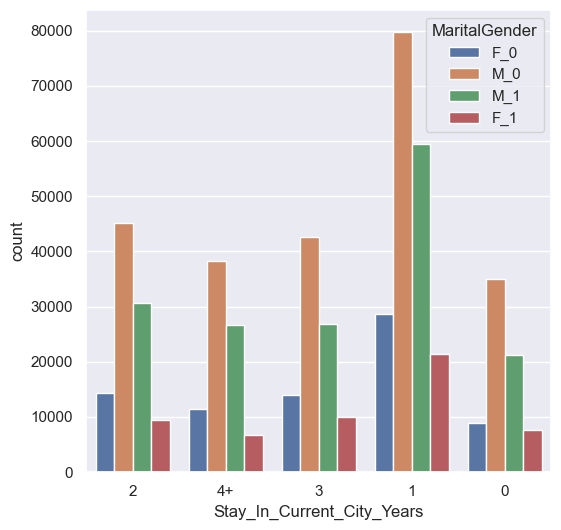

In [49]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue= df['MaritalGender'])

CITY CATEGORY BASED UPON MARITAL GENDER

<Axes: xlabel='City_Category', ylabel='count'>

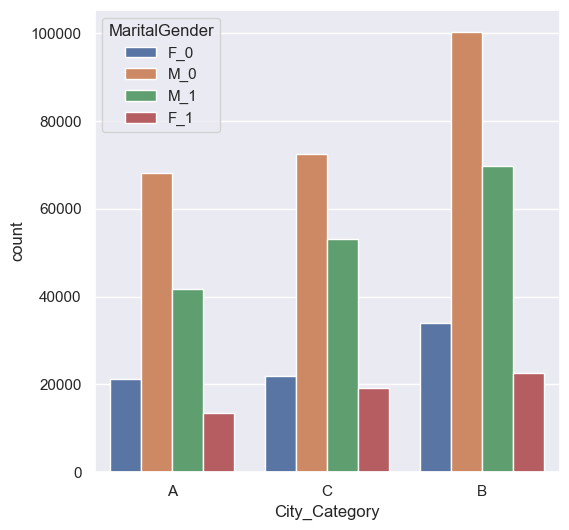

In [50]:
sns.countplot(x = df['City_Category'], hue= df['MaritalGender'])

In [52]:
# Create a summary DataFrame
summary_data = {
    "Metric": [
        "Total Records",
        "Unique Product IDs",
        "Unique Genders",
        "Unique Age Groups",
        "Unique Occupations",
        "Unique City Categories",
        "Unique Stay In Current City Years",
        "Unique Marital Statuses",
        "Average Purchase Amount"
    ],
    "Value": [
        len(df),
        df['Product_ID'].nunique(),
        df['Gender'].nunique(),
        df['Age'].nunique(),
        df['Occupation'].nunique(),
        df['City_Category'].nunique(),
        df['Stay_In_Current_City_Years'].nunique(),
        df['Marital_Status'].nunique(),
        df['Purchase'].mean()
    ]
}

# Convert to DataFrame
summary_df = pd.DataFrame(summary_data)

# Save to CSV
summary_df.to_csv("black_friday_summary_operations.csv", index=False)